## Time Series 

11/01/2020

---

In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
# Import dataset 

df1 = pd.read_csv('~/Documents/GitHub/various-projects/data/daily-total-female-births-CA.csv', header=0)

In [3]:
df1.head(2)

,date,births
0,1959-01-01,35
1,1959-01-02,32


In [4]:
# Loading data with parse_dates

df2 = pd.read_csv('~/Documents/GitHub/various-projects/data/daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

In [5]:
df2.head(2)

,date,births
0,1959-01-01,35
1,1959-01-02,32


In [6]:
df2.shape

(365, 2)

In [7]:
# Loading data as a series

df3 = pd.read_csv('~/Documents/GitHub/various-projects/data/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [8]:
df3.head(2)

date
1959-01-01    35
1959-01-02    32
Name: births, dtype: int64

In [9]:
df3.shape

(365,)

In [10]:
# Exploring Time Series data

# Quering by time

print(df3['1959-01'].head())

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64


In [11]:
# Quering by time

df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')].head()

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29


In [12]:
# Descriptive statistics 

df3.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [13]:
# Descriptive statistics 

df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [14]:
# Feature Engineering

# Lag features

features = df2.copy()
features['lag1'] =  df2['births'].shift(1)
features['lag2'] =  df2['births'].shift(2)
features['roll_mean'] = df2['births'].rolling(window = 2).mean()
features.head(5)

,date,births,lag1,lag2,roll_mean
0,1959-01-01,35,NaN,NaN,NaN
1,1959-01-02,32,35.0,NaN,33.5
2,1959-01-03,30,32.0,35.0,31.0
3,1959-01-04,31,30.0,32.0,30.5
4,1959-01-05,44,31.0,30.0,37.5


In [15]:
# Expanding features 

features['Expand_max'] = df2['births'].expanding().max()
features.head(5)

,date,births,lag1,lag2,roll_mean,Expand_max
0,1959-01-01,35,NaN,NaN,NaN,35.0
1,1959-01-02,32,35.0,NaN,33.5,35.0
2,1959-01-03,30,32.0,35.0,31.0,35.0
3,1959-01-04,31,30.0,32.0,30.5,35.0
4,1959-01-05,44,31.0,30.0,37.5,44.0


In [16]:
# Date time features

features['year'] = df2['date'].dt.year
features['month'] = df2['date'].dt.month
features['day'] = df2['date'].dt.day
features.head(5)

,date,births,lag1,lag2,roll_mean,Expand_max,year,month,day
0,1959-01-01,35,NaN,NaN,NaN,35.0,1959,1,1
1,1959-01-02,32,35.0,NaN,33.5,35.0,1959,1,2
2,1959-01-03,30,32.0,35.0,31.0,35.0,1959,1,3
3,1959-01-04,31,30.0,32.0,30.5,35.0,1959,1,4
4,1959-01-05,44,31.0,30.0,37.5,44.0,1959,1,5


In [17]:
# Time Series visualizaiton 

from matplotlib import pyplot as plt
%matplotlib inline

df2_vis = df2.copy()
df2_vis.head(2)

,date,births
0,1959-01-01,35
1,1959-01-02,32


<AxesSubplot:>

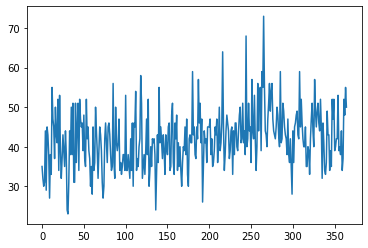

In [18]:
# Plot by births 

df2_vis['births'].plot()

<AxesSubplot:xlabel='date'>

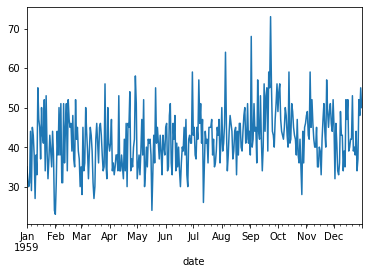

In [19]:
# Indexing plot by date & ploting again 

df2_vis.index = df2_vis['date'] 
df2_vis['births'].plot()

<AxesSubplot:xlabel='date'>

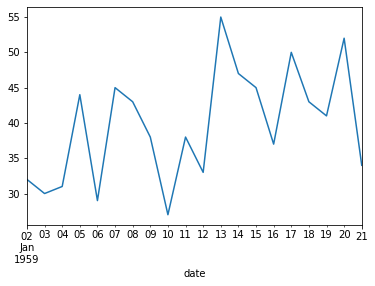

In [20]:
# Plot specific time frame 

df2_vis = df2_vis[(df2_vis['date'] > '1959-01-01') & (df2_vis['date'] <= '1959-01-21')].copy()
df2_vis['births'].plot()

<AxesSubplot:ylabel='births'>

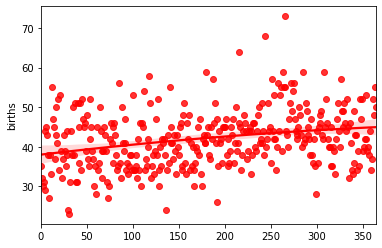

In [21]:
# Tredline

import seaborn as sns

sns.regplot(x= df2.index.values, y=df2['births'], order = 2, color ='red')

In [22]:
# Removing seasonality on a new dataset 

miles_df = pd.read_csv('~/Documents/GitHub/various-projects/data/us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

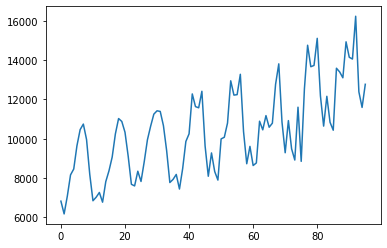

In [23]:
# Plot miles 

miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

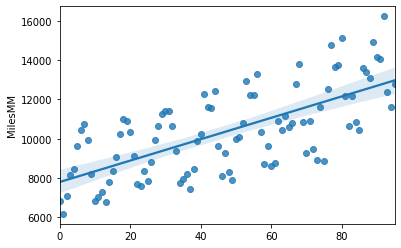

In [24]:
# Linear regression plot on miles 

sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

In [25]:
# Creating year column 

miles_df['year'] = miles_df['Month'].dt.year
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [26]:
# Grouping by mean for a given year

miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

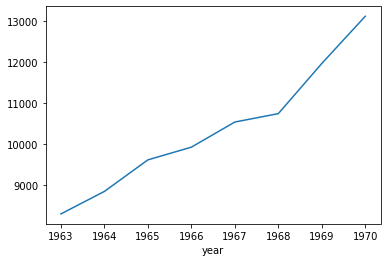

In [27]:
# Plotting without seasonality 

miles_df.groupby('year')['MilesMM'].mean().plot()

In [28]:
# Creating lag

miles_df['lag1'] =  miles_df['MilesMM'].shift(1)
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

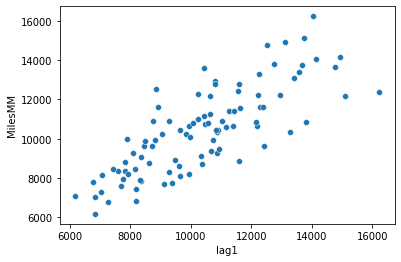

In [29]:
# Plotting with lag

sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

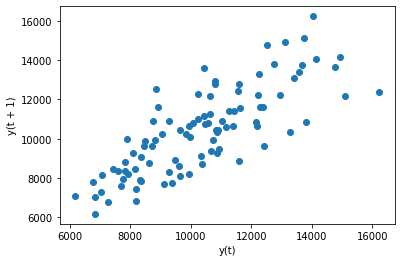

In [30]:
# Plotting with lag in Pandas

from pandas.plotting import lag_plot

lag_plot(miles_df['MilesMM'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

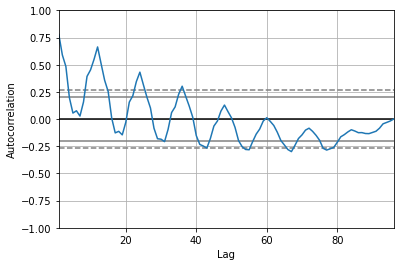

In [31]:
# Autocorrection plots 

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(miles_df['MilesMM'])

In [32]:
# Decomposing Time Series 

from statsmodels.tsa.seasonal import seasonal_decompose

miles_decomp_df = pd.read_csv('~/Documents/GitHub/various-projects/data/us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


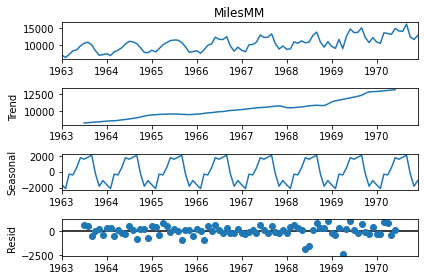

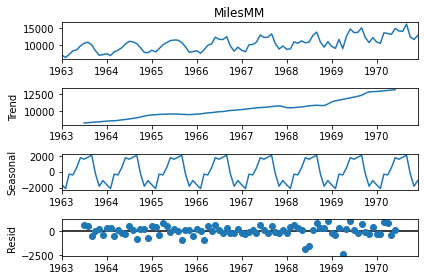

In [33]:
# Plot with Additive Model ->  y(t) = Level + Trend + Seasonality + Noise

miles_decomp_df.index = miles_decomp_df['Month'] 
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')
result.plot()

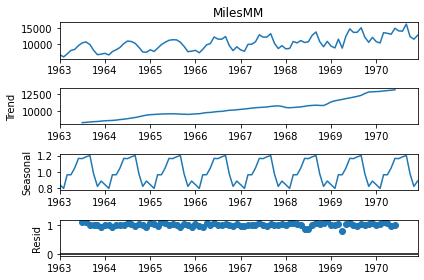

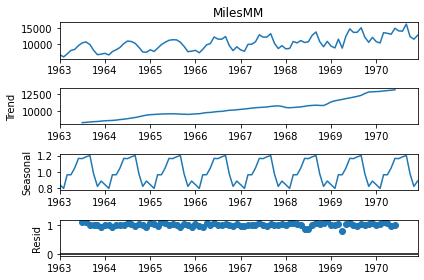

In [34]:
# Plot with Multiplicative Model -> y(t) = Level * Trend * Seasonality * Noise

result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')
result2.plot()

In [35]:
# Differencing

# miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [36]:
# Persistence Model on a new dataset 

df = pd.read_csv('~/Documents/GitHub/various-projects/data/daily-min-temperatures.csv', header=0 , parse_dates=[0])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [37]:
# t column for Temp

df['t'] =  df['Temp'].shift(1)
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [38]:
# Tain and test on dataset 

train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [39]:
# Assign train and test 

train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

In [40]:
# Validation

predictions = test_X.copy()
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [41]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

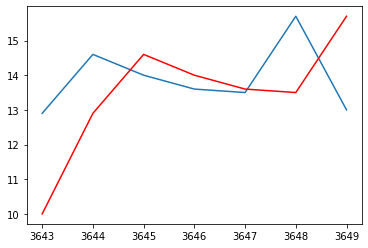

In [42]:
# Plot 

from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [43]:
# Autoregression Model

df = pd.read_csv('~/Documents/GitHub/various-projects/data/daily-min-temperatures.csv', header=0 , parse_dates=[0])
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [44]:
# Build model

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit()

In [45]:
# No. of lag Variables

model_fit.k_ar

29

In [46]:
# Coef of lag variables

model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [47]:
# Predictions 

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [48]:
# First prediction 

predictions.iloc[0]

11.87127484772784

In [49]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.501525231006946

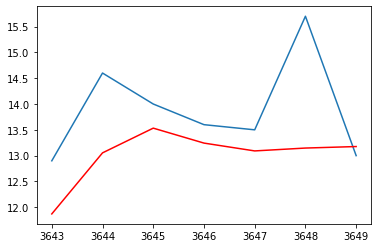

In [50]:
# Plot

pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [51]:
# Moving Average Model

df = pd.read_csv('~/Documents/GitHub/various-projects/data/daily-min-temperatures.csv', header=0 , parse_dates=[0])
df['t'] =  df['Temp'].shift(1)
df['Resid'] = df['Temp'] - df['t']
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [52]:
# Train and test 

train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [53]:
# Build model 

from statsmodels.tsa.ar_model import AR

model = AR(train)
model_fit = model.fit()

In [54]:
# No. of lag Variables

model_fit.k_ar

29

In [55]:
# Coef of lag variables

model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [56]:
# Predictions resid

pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [57]:
# Last seven predictions 

df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [58]:
# Predictions 

predictions = df.t[df.shape[0]-7:] + pred_resid
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [59]:
# Moving Average Model

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648208

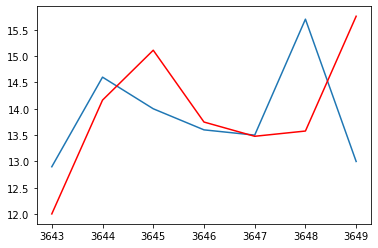

In [60]:
# Plot

pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [61]:
# ARIMA Model with a new dataset 

df = pd.read_csv('~/Documents/GitHub/various-projects/data/shampoo.csv', header=0, parse_dates=[0])
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<AxesSubplot:>

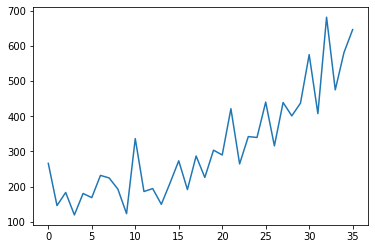

In [62]:
# Plot

df['Sales'].plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

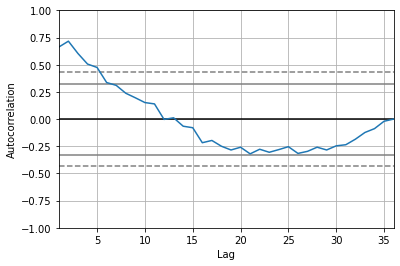

In [63]:
# Autocorrelation plot

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

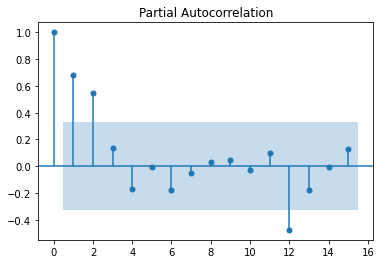

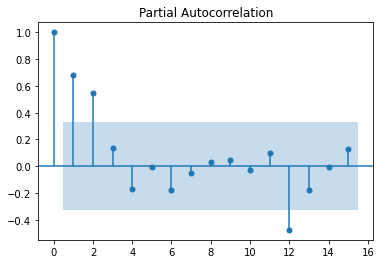

In [64]:
# Partial autocorrelation 

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Sales'], lags=15)

In [65]:
## SARIMA or Seasonal ARIMA with new dataset

from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('~/Documents/GitHub/various-projects/data/us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [66]:
# Index month

df.index = df['Month'] 

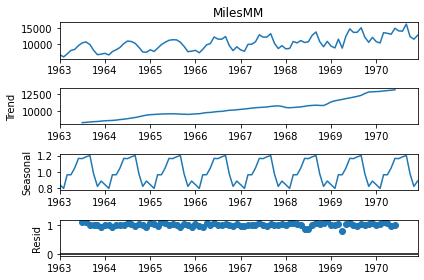

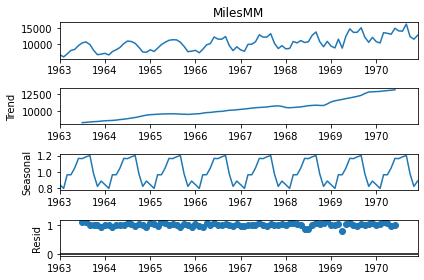

In [67]:
# Plot with Multiplicative Model -> y(t) = Level * Trend * Seasonality * Noise

result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [68]:
# SARIMAX build 

model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

In [69]:
# Model fit

model_fit = model.fit()

In [70]:
# Residuals 

residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

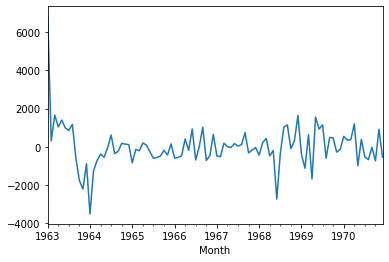

In [71]:
# Residuals model

residuals.plot()

In [72]:
# Output forecast 

output = model_fit.forecast()

In [73]:
# Output result

output

1971-01-01    11475.9579
Freq: MS, dtype: float64

In [74]:
# Forecast 

model_fit.forecast(12)

1971-01-01    11475.957900
1971-02-01    11153.502434
1971-03-01    13669.567237
1971-04-01    12647.447495
1971-05-01    14338.992355
1971-06-01    15786.487692
1971-07-01    14979.251099
1971-08-01    15362.131696
1971-09-01    16962.938847
1971-10-01    13682.113398
1971-11-01    12426.935030
1971-12-01    13730.180995
Freq: MS, Name: predicted_mean, dtype: float64

In [75]:
# Prediction

yhat = model_fit.predict()
yhat.head()

1963-01-01       0.000000
1963-02-01    5872.167887
1963-03-01    5422.389899
1963-04-01    7122.441402
1963-05-01    7067.530156
Freq: MS, Name: predicted_mean, dtype: float64

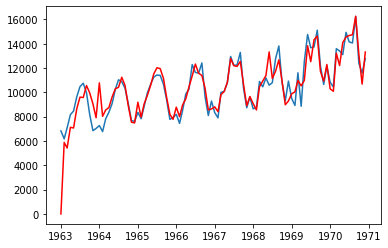

In [76]:
# Prediction plot

pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')